Logistic Regression: 0.9827 (+/- 0.0265)
Decision Tree: 0.9095 (+/- 0.0528)
KNN: 0.9719 (+/- 0.0281)
LDA: 0.9833 (+/- 0.0255)
Naive Bayes: 0.9771 (+/- 0.0280)
SVM: 0.9827 (+/- 0.0265)

Best Model: LDA with accuracy: 0.9833


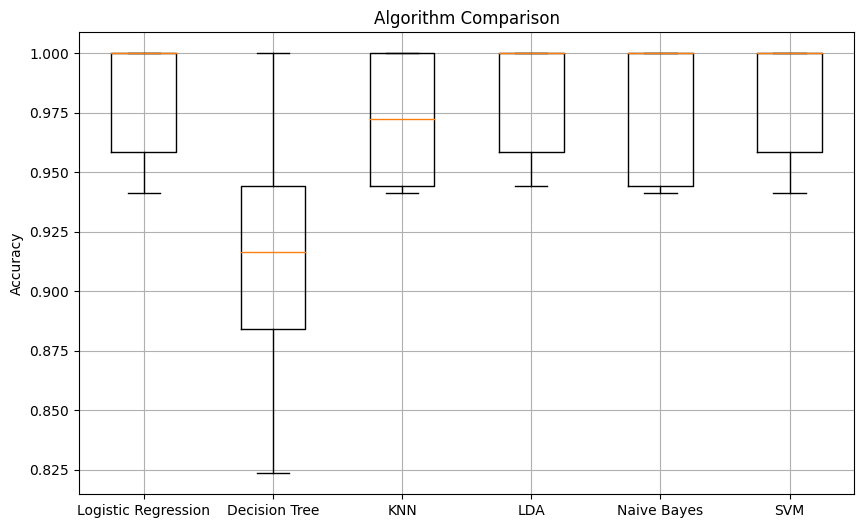

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load the Wine dataset
wine = load_wine()
X, Y = wine.data, wine.target

# Prepare configuration for cross-validation
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC())
]


# Evaluate models
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# Find best model
best_model_index = np.argmax([np.mean(r) for r in results])
best_model_name = names[best_model_index]
best_model_score = np.mean(results[best_model_index])
print(f"\nBest Model: {best_model_name} with accuracy: {best_model_score:.4f}")

# Boxplot to compare
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
